<a href="https://colab.research.google.com/github/mbruner3/64061_mbruner3/blob/master/IMDBAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ASSIGNMENT #1: NEURAL NETWORKS**
*Advanced Machine Learning <br>
Course # 64061 <br>*
Mark Bruner


**NOTE:** Use the table of contents to navigate around my assignment.

## **ASSIGNMENT CONCLUSIONS**

### **SINGLE & THREE LAYER CONCLUSIONS:**

**Single Layer**
Removing a layer caused the validation loss to increase slowly and not as quickly as the initial model with two layers. 

**Three Layer**
The three layer model caused the validation loss to increase more quickly compared to the other two models. The range in 8 epochs was from 0.28 to 0.41 whereas the initial model was from 0.26 to 0.36. Also, the loss curve was jumping around and didn't maintain a specific predictable pattern. 



### **MORE & LESS HIDDEN UNITS CONCLUSIONS**

**More Hidden Units**
Increasing the number of hidden units caused my to increase quickly and overfit earlier.

**Less Hidden Units**
The validation loss for less number of hidden units caused the validation loss to follow closely the train loss curve until epoch 4. After that the validation loss became greater while the train loss converged to almost 0. The overfitting happened a lot slower.

### **MSE CONCLUSIONS**

Mean Squared Error performed better than the other models with a validation loss of only 0.1092 a significant improvement. However, MSE is not a good loss classifier for a classification problem. The reason is that it asssumes a normal distribution but obviously that is not true for a binary classification. Also, this classifier does not perform well on non-convex functions like our Sigmoid function because it will get "stuck" and will not be able to find the minimum.  

### **TANH CONCLUSIONS**
tanh Activation function did a decent job as the validation loss but to me it seems like the relu function caused the model to overfit more quickly. 

### **LAST MODEL OPTIMIZATION CONCLUSIONS**
I used dropouts of .5 and .1 to reduce the validation loss by a very small amount compared to Chollet's model. By like 0.002, which that is after trying to add layers, remove units, add units, trying different regularizers, and different batch sizes. Nothing really seemed to make it much better but I am sure there is a way. I just couldn't do it and after spending 40 hours on this assignment I think I need to let it go and be happy with my 0.002 less than Chollet lowest on Epoch 3!  

## **Importing Libraries, Loading Datasets, Vectorizing Data**

In [ ]:
import keras # importing keras library.
import numpy as np # importing numpy library.

In [ ]:
from keras.datasets import imdb # loading IMDB dataset from Keras.

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
data = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
print("Categories:", np.unique(labels)) # Determining the categories within the dataset.
print("Number of unique words:", len(np.unique(np.hstack(data)))) # Showing the number of unique words in the dataset.

Categories: [0 1]
Number of unique words: 9998


In [ ]:
length = [len(i) for i in data] # Caluculating the average review length and sd.
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Average Review length: 234.75892
Standard Deviation: 173


In [ ]:
def vectorize(sequences, dimension = 10000): # vectorizing the dataset.
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results
 
data = vectorize(data)
labels = np.array(labels).astype("float32")

In [ ]:
data.shape # showing the size of the dataset.

(50000, 10000)

In [ ]:
from sklearn.model_selection import train_test_split

# Creating train, test, and validation sets using train_test_split.
# Split the data
x_train_val, x_test, y_train_val, y_test = train_test_split(data, labels, test_size=0.2, shuffle= True)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.25, shuffle= True)


In [ ]:
x_test.shape # showing the shape of the test.

(10000, 10000)

In [ ]:
x_val.shape # showing the shape of the validation.

(10000, 10000)

In [ ]:
x_train.shape # showing the shape of the train.

(30000, 10000)

## **PART 1:**

### **Initial Model: Chollet's Model**

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

<a name="initial-valid-output"></a>
#### **Train & Validation Output**

In [ ]:
history = model.fit(x_train,
                    y_train,
                    epochs=8,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/8
59/59 [==============================] - 2s 25ms/step - loss: 0.5563 - accuracy: 0.7508 - val_loss: 0.3195 - val_accuracy: 0.8853
Epoch 2/8
59/59 [==============================] - 1s 17ms/step - loss: 0.2780 - accuracy: 0.9052 - val_loss: 0.2673 - val_accuracy: 0.8945
Epoch 3/8
59/59 [==============================] - 1s 17ms/step - loss: 0.2114 - accuracy: 0.9244 - val_loss: 0.2580 - val_accuracy: 0.8975
Epoch 4/8
59/59 [==============================] - 1s 17ms/step - loss: 0.1710 - accuracy: 0.9420 - val_loss: 0.2700 - val_accuracy: 0.8939
Epoch 5/8
59/59 [==============================] - 1s 17ms/step - loss: 0.1529 - accuracy: 0.9478 - val_loss: 0.2896 - val_accuracy: 0.8902
Epoch 6/8
59/59 [==============================] - 1s 17ms/step - loss: 0.1390 - accuracy: 0.9524 - val_loss: 0.3051 - val_accuracy: 0.8891
Epoch 7/8
59/59 [==============================] - 1s 17ms/step - loss: 0.1221 - accuracy: 0.9592 - val_loss: 0.3153 - val_accuracy: 0.8876
Epoch 8/8
59/59 [===

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<a name="initial-plots"></a>
#### **Output Plots**

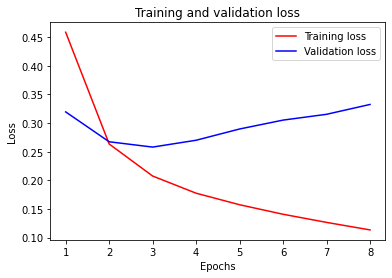

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

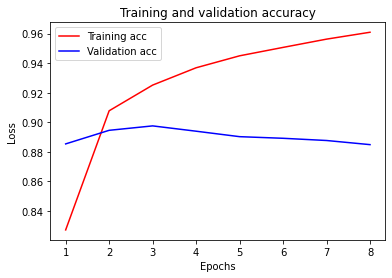

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train_val, y_train_val, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
79/79 [==============================] - 2s 14ms/step - loss: 0.5150 - accuracy: 0.7742
Epoch 2/4
79/79 [==============================] - 1s 14ms/step - loss: 0.2446 - accuracy: 0.9117
Epoch 3/4
79/79 [==============================] - 1s 14ms/step - loss: 0.1982 - accuracy: 0.9270
Epoch 4/4
313/313 [==============================] - 1s 3ms/step - loss: 0.2723 - accuracy: 0.8942


In [ ]:
results


[0.2722981572151184, 0.8942000269889832]

## **PART 2:**

### **Single Layer Neural Network**

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

<a name="single-valid-output"></a>
#### **Train & Validation Output**

In [ ]:
history = model.fit(x_train,
                    y_train,
                    epochs=8,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/8
59/59 [==============================] - 2s 21ms/step - loss: 0.5298 - accuracy: 0.7544 - val_loss: 0.3232 - val_accuracy: 0.8895
Epoch 2/8
59/59 [==============================] - 1s 16ms/step - loss: 0.2823 - accuracy: 0.9045 - val_loss: 0.2722 - val_accuracy: 0.8970
Epoch 3/8
59/59 [==============================] - 1s 17ms/step - loss: 0.2155 - accuracy: 0.9265 - val_loss: 0.2611 - val_accuracy: 0.8988
Epoch 4/8
59/59 [==============================] - 1s 17ms/step - loss: 0.1905 - accuracy: 0.9328 - val_loss: 0.2632 - val_accuracy: 0.8989
Epoch 5/8
59/59 [==============================] - 1s 17ms/step - loss: 0.1638 - accuracy: 0.9446 - val_loss: 0.2666 - val_accuracy: 0.8933
Epoch 6/8
59/59 [==============================] - 1s 17ms/step - loss: 0.1495 - accuracy: 0.9507 - val_loss: 0.2727 - val_accuracy: 0.8962
Epoch 7/8
59/59 [==============================] - 1s 17ms/step - loss: 0.1397 - accuracy: 0.9526 - val_loss: 0.2822 - val_accuracy: 0.8929
Epoch 8/8
59/59 [===

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<a name="single-plots"></a>
#### **Output Plots**

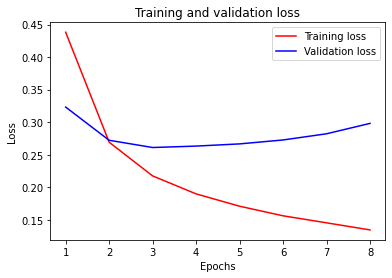

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

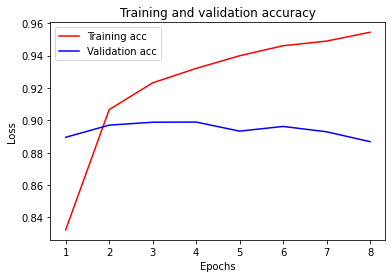

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<a name="three-test-output"></a>
### **Three Layer Neural Network**

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

<a name="three-valid-output"></a>
#### **Train & Validation Output**

In [ ]:
history = model.fit(x_train,
                    y_train,
                    epochs=8,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/8
59/59 [==============================] - 2s 21ms/step - loss: 0.5511 - accuracy: 0.7455 - val_loss: 0.3093 - val_accuracy: 0.8874
Epoch 2/8
59/59 [==============================] - 1s 17ms/step - loss: 0.2594 - accuracy: 0.9083 - val_loss: 0.2756 - val_accuracy: 0.8909
Epoch 3/8
59/59 [==============================] - 1s 17ms/step - loss: 0.2006 - accuracy: 0.9266 - val_loss: 0.2640 - val_accuracy: 0.8974
Epoch 4/8
59/59 [==============================] - 1s 17ms/step - loss: 0.1593 - accuracy: 0.9422 - val_loss: 0.2781 - val_accuracy: 0.8929
Epoch 5/8
59/59 [==============================] - 1s 17ms/step - loss: 0.1461 - accuracy: 0.9475 - val_loss: 0.3366 - val_accuracy: 0.8787
Epoch 6/8
59/59 [==============================] - 1s 22ms/step - loss: 0.1328 - accuracy: 0.9516 - val_loss: 0.3246 - val_accuracy: 0.8888
Epoch 7/8
59/59 [==============================] - 1s 17ms/step - loss: 0.1112 - accuracy: 0.9607 - val_loss: 0.3515 - val_accuracy: 0.8813
Epoch 8/8
59/59 [===

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<a name="three-plots"></a>
#### **Output Plots**

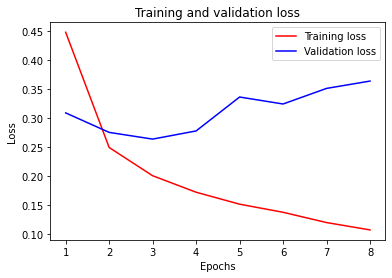

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "r" is for "red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

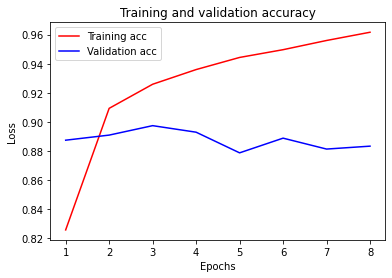

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## **PART 3**:

### **More Hidden Units**

---



In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

<a name="hidden-layer-valid-output"></a>
#### **Train & Validation Output**

In [ ]:
history = model.fit(x_train,
                    y_train,
                    epochs=8,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/8
59/59 [==============================] - 2s 21ms/step - loss: 0.5255 - accuracy: 0.7407 - val_loss: 0.2994 - val_accuracy: 0.8830
Epoch 2/8
59/59 [==============================] - 1s 17ms/step - loss: 0.2452 - accuracy: 0.9091 - val_loss: 0.3135 - val_accuracy: 0.8731
Epoch 3/8
59/59 [==============================] - 1s 17ms/step - loss: 0.1880 - accuracy: 0.9313 - val_loss: 0.2672 - val_accuracy: 0.8951
Epoch 4/8
59/59 [==============================] - 1s 17ms/step - loss: 0.1577 - accuracy: 0.9432 - val_loss: 0.2849 - val_accuracy: 0.8919
Epoch 5/8
59/59 [==============================] - 1s 17ms/step - loss: 0.1365 - accuracy: 0.9506 - val_loss: 0.3044 - val_accuracy: 0.8883
Epoch 6/8
59/59 [==============================] - 1s 17ms/step - loss: 0.1286 - accuracy: 0.9544 - val_loss: 0.3231 - val_accuracy: 0.8877
Epoch 7/8
59/59 [==============================] - 1s 17ms/step - loss: 0.1133 - accuracy: 0.9595 - val_loss: 0.3544 - val_accuracy: 0.8836
Epoch 8/8
59/59 [===

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<a name="more-hidden-plots"></a>
#### **Plots**

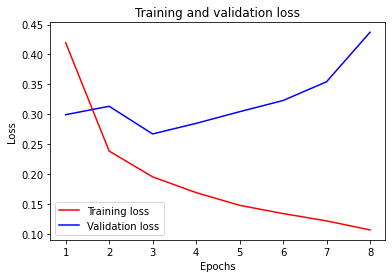

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "r" is for "red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

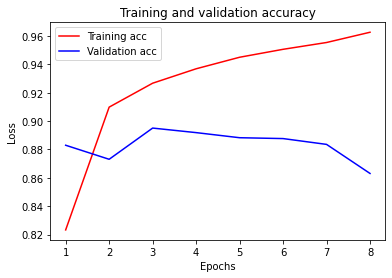

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### **Less hidden units**

---



In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

<a name="less-hidden-layer-valid-output"></a>
#### **Train & Validation Output**

In [ ]:
history = model.fit(x_train,
                    y_train,
                    epochs=8,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/8
59/59 [==============================] - 2s 22ms/step - loss: 0.6058 - accuracy: 0.6962 - val_loss: 0.4972 - val_accuracy: 0.8330
Epoch 2/8
59/59 [==============================] - 1s 18ms/step - loss: 0.4731 - accuracy: 0.8707 - val_loss: 0.4564 - val_accuracy: 0.8722
Epoch 3/8
59/59 [==============================] - 1s 18ms/step - loss: 0.3955 - accuracy: 0.9103 - val_loss: 0.3363 - val_accuracy: 0.8963
Epoch 4/8
59/59 [==============================] - 1s 18ms/step - loss: 0.2632 - accuracy: 0.9348 - val_loss: 0.2803 - val_accuracy: 0.8971
Epoch 5/8
59/59 [==============================] - 1s 18ms/step - loss: 0.2015 - accuracy: 0.9417 - val_loss: 0.2740 - val_accuracy: 0.8943
Epoch 6/8
59/59 [==============================] - 1s 19ms/step - loss: 0.1716 - accuracy: 0.9495 - val_loss: 0.2732 - val_accuracy: 0.8937
Epoch 7/8
59/59 [==============================] - 1s 18ms/step - loss: 0.1488 - accuracy: 0.9549 - val_loss: 0.2828 - val_accuracy: 0.8904
Epoch 8/8
59/59 [===

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<a name="less-hidden-plot"></a>
#### **Plots**

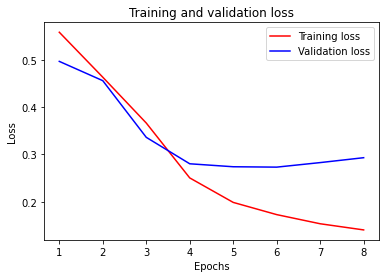

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "r" is for "red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

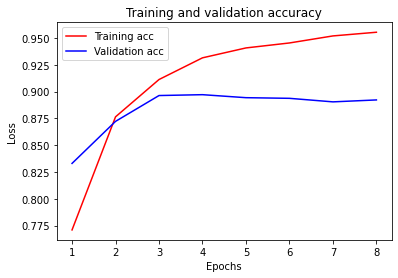

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## **PART 4:**

###  **MSE Loss Function**

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='mean_squared_error',
              metrics=['accuracy'])

<a name="MSE-valid-output"></a>
#### **Train & Validation Output**

In [ ]:
history = model.fit(x_train,
                    y_train,
                    epochs=8,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/8
59/59 [==============================] - 2s 21ms/step - loss: 0.1872 - accuracy: 0.7397 - val_loss: 0.0954 - val_accuracy: 0.8958
Epoch 2/8
59/59 [==============================] - 1s 17ms/step - loss: 0.0789 - accuracy: 0.9127 - val_loss: 0.0849 - val_accuracy: 0.8915
Epoch 3/8
59/59 [==============================] - 1s 22ms/step - loss: 0.0597 - accuracy: 0.9295 - val_loss: 0.0831 - val_accuracy: 0.8869
Epoch 4/8
59/59 [==============================] - 1s 17ms/step - loss: 0.0493 - accuracy: 0.9431 - val_loss: 0.0806 - val_accuracy: 0.8917
Epoch 5/8
59/59 [==============================] - 1s 17ms/step - loss: 0.0424 - accuracy: 0.9514 - val_loss: 0.0806 - val_accuracy: 0.8890
Epoch 6/8
59/59 [==============================] - 1s 16ms/step - loss: 0.0371 - accuracy: 0.9609 - val_loss: 0.0837 - val_accuracy: 0.8874
Epoch 7/8
59/59 [==============================] - 1s 17ms/step - loss: 0.0339 - accuracy: 0.9629 - val_loss: 0.0859 - val_accuracy: 0.8863
Epoch 8/8
59/59 [===

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

<a name="MSE-valid-output"></a>
#### **Plots**

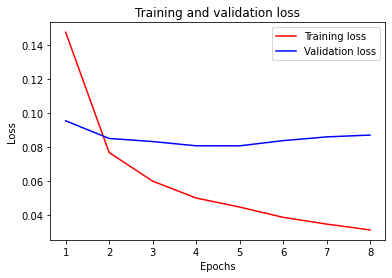

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "r" is for "red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

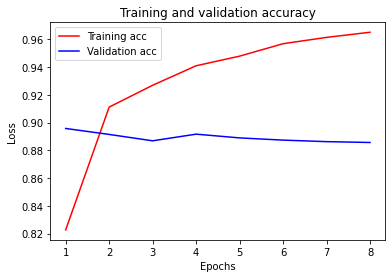

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## **PART 5:**

### **tanh Activation Function**

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000, )))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### **Train & Validation Output**

In [ ]:
history = model.fit(x_train,
                    y_train,
                    epochs=8,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/8
59/59 [==============================] - 2s 21ms/step - loss: 0.5135 - accuracy: 0.7742 - val_loss: 0.2970 - val_accuracy: 0.8873
Epoch 2/8
59/59 [==============================] - 1s 17ms/step - loss: 0.2418 - accuracy: 0.9116 - val_loss: 0.2710 - val_accuracy: 0.8898
Epoch 3/8
59/59 [==============================] - 1s 17ms/step - loss: 0.1836 - accuracy: 0.9318 - val_loss: 0.2736 - val_accuracy: 0.8944
Epoch 4/8
59/59 [==============================] - 1s 17ms/step - loss: 0.1558 - accuracy: 0.9443 - val_loss: 0.2878 - val_accuracy: 0.8926
Epoch 5/8
59/59 [==============================] - 1s 17ms/step - loss: 0.1325 - accuracy: 0.9544 - val_loss: 0.3276 - val_accuracy: 0.8829
Epoch 6/8
59/59 [==============================] - 1s 17ms/step - loss: 0.1175 - accuracy: 0.9608 - val_loss: 0.3268 - val_accuracy: 0.8879
Epoch 7/8
59/59 [==============================] - 1s 17ms/step - loss: 0.1119 - accuracy: 0.9635 - val_loss: 0.3458 - val_accuracy: 0.8822
Epoch 8/8
59/59 [===

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### **Plots**

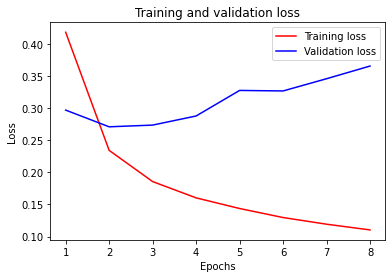

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "r" is for "red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

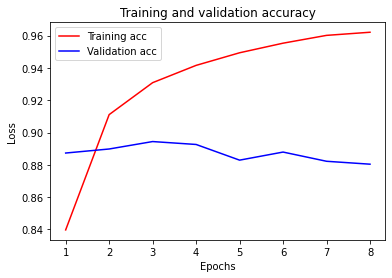

In [ ]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## **PART 6:**

### **Optimizing Model: Regularization**

In [ ]:
from keras import models
from keras import layers
from keras import regularizers
from keras import optimizers


model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))


In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,
                    y_train,
                    epochs=8,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/8
59/59 [==============================] - 2s 21ms/step - loss: 0.5947 - accuracy: 0.6813 - val_loss: 0.3509 - val_accuracy: 0.8725
Epoch 2/8
59/59 [==============================] - 1s 17ms/step - loss: 0.3605 - accuracy: 0.8601 - val_loss: 0.2712 - val_accuracy: 0.8923
Epoch 3/8
59/59 [==============================] - 1s 17ms/step - loss: 0.2685 - accuracy: 0.9008 - val_loss: 0.2560 - val_accuracy: 0.8963
Epoch 4/8
59/59 [==============================] - 1s 17ms/step - loss: 0.2327 - accuracy: 0.9169 - val_loss: 0.2579 - val_accuracy: 0.8967
Epoch 5/8
59/59 [==============================] - 1s 18ms/step - loss: 0.1952 - accuracy: 0.9334 - val_loss: 0.2718 - val_accuracy: 0.8960
Epoch 6/8
59/59 [==============================] - 1s 17ms/step - loss: 0.1771 - accuracy: 0.9370 - val_loss: 0.2980 - val_accuracy: 0.8885
Epoch 7/8
59/59 [==============================] - 1s 18ms/step - loss: 0.1563 - accuracy: 0.9468 - val_loss: 0.3000 - val_accuracy: 0.8957
Epoch 8/8
59/59 [===

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### **Plots**

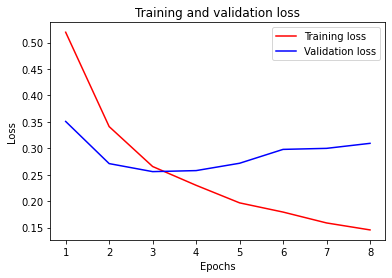

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

# "r" is for "red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

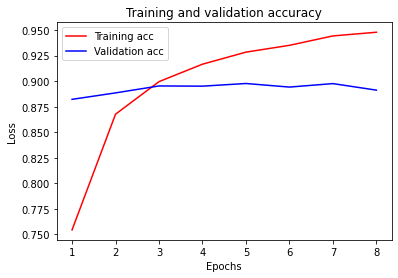

In [ ]:
plt.clf()   # clear figure
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0000001), activation='relu', input_shape=(10000, )))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l1(0.0000001), activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### **Test Results**

In [ ]:
model.fit(x_train_val, y_train_val, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
79/79 [==============================] - 2s 15ms/step - loss: 0.6004 - accuracy: 0.6877
Epoch 2/4
79/79 [==============================] - 1s 15ms/step - loss: 0.3877 - accuracy: 0.8601
Epoch 3/4
79/79 [==============================] - 1s 15ms/step - loss: 0.3084 - accuracy: 0.8947
Epoch 4/4
313/313 [==============================] - 1s 3ms/step - loss: 0.2605 - accuracy: 0.8970


In [ ]:
results


[0.27777594327926636, 0.8912000060081482]